In [275]:
import math  
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
%matplotlib inline
PyAudio = pyaudio.PyAudio
import struct
from scipy import signal

In [3]:
def env(t,w,T=2):
    return np.piecewise(
        t,
        [t<w,
         t>w,
         t>=T-w],
        [lambda t: t/w,
         1, 
         lambda t:(T-t)/w])    

In [431]:
def play(f,duration=2,bitrate=40000,attack=0.1):

    A = (2**15-1)
    t = np.linspace(0,duration,duration*bitrate)
    y = f(t)
    y = A * env(t,attack,T=duration) * y
    y = y.astype(np.int16)

    wave = b''
    for v in y:
        wave += struct.pack("h", v)

    p = PyAudio()
    stream = p.open(format = p.get_format_from_width(2), 
                    channels = 1, 
                    rate = bitrate, 
                    output = True,
                   )

    stream.write(wave)
    stream.stop_stream()
    stream.close()
    p.terminate()
    


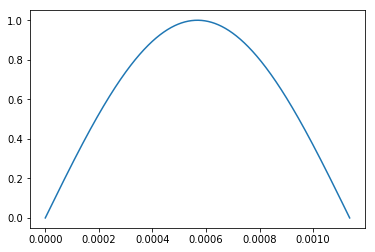

In [408]:
# A pure sine wave

def f(t):
    omega = 440
    return np.sin(2*np.pi*omega*t) 
play(f)

t = np.linspace(0,1/880,1000)
plt.plot(t,f(t));

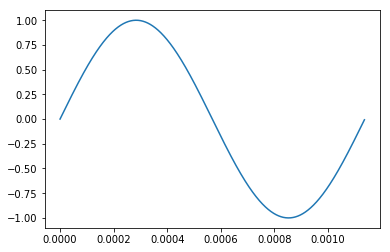

In [308]:
# Pitch changing

def f(t):
    omega = 880
    return np.sin(2*np.pi*omega*t / (t+1))
    
play(f)

t = np.linspace(0,1/880,1000)
plt.plot(t,f(t));

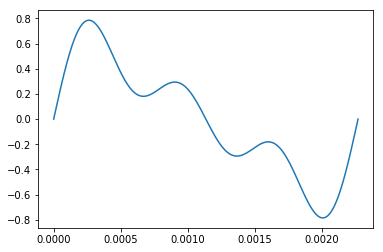

In [309]:
# Sine wave with harmonics
def f(t):
    omega = 440
    return 0.5*np.sin(2*np.pi*omega*t) + \
           0.25*np.sin(2*np.pi*(omega*2)*t) + \
           0.25*np.sin(2*np.pi*(omega*3)*t)
    
play(f)

t = np.linspace(0,1/440,1000)
plt.plot(t,f(t));

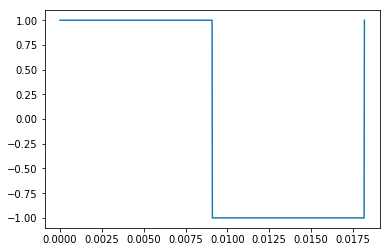

In [310]:
# Square wave: Note the noisy harmonics

def f(t):
    omega = 55
    return signal.square(2*np.pi*omega*t)
    
play(f)

t = np.linspace(0,1/55,1000)
plt.plot(t,f(t));

Text(0, 0.5, 'Frequency')

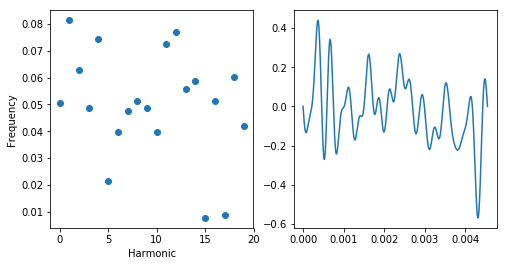

In [407]:
# Random wave form

N = 20  
a = np.array([np.random.rand() for _ in range(N)])
a = a / sum(a)
p = [np.random.rand()*2*np.pi for _ in range(N)]

def f(t):
    omega = 220
    w = [a[n]*np.sin(2*np.pi*n*omega*t+p[n]) for n in range(N)]
    return sum(w)
    
play(f)

fig,ax=plt.subplots(1,2,figsize=(8,4))
t = np.linspace(0,1/220,1000)
ax[0].plot(a,'o')
ax[1].plot(t,f(t))
ax[0].set_xlabel("Harmonic")
ax[0].set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

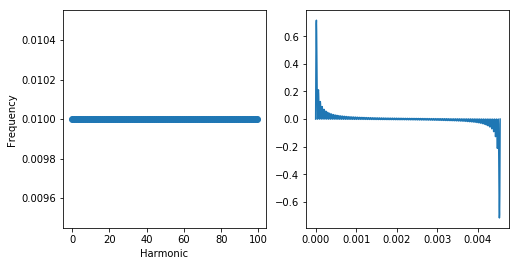

In [280]:
# Uniform wave form

N = 100
a = np.array([1 for _ in range(N)])
a = a / sum(a)
p = [0 for _ in range(N)]

def f(t):
    omega = 220
    w = [a[n]*np.sin(2*np.pi*n*omega*t+p[n]) for n in range(N)]
    return sum(w)
    
play(f)

fig,ax=plt.subplots(1,2,figsize=(8,4))
t = np.linspace(0,1/220,1000)
ax[0].plot(a,'o')
ax[1].plot(t,f(t))
ax[0].set_xlabel("Harmonic")
ax[0].set_ylabel("Frequency")

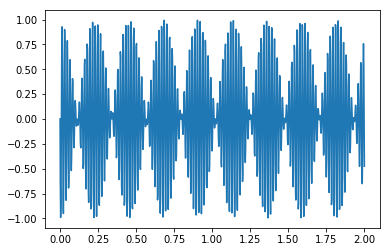

In [286]:
# Beating due to almost similar wave forms

def f(t):
    omega = 440
    return 0.5 * np.sin(2*np.pi*omega*t) + 0.5 * np.sin(2*np.pi*1.01*omega*t)
    
play(f)

t = np.linspace(0,2,1000)
plt.plot(t,f(t));

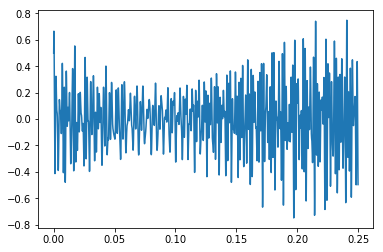

In [360]:
# G Minor

def f(t):
    e = 1.005
    return 0.125 * np.sin(2*np.pi*392/2*t)    + \
           0.125 * np.cos(2*np.pi*e*392*t)    + \
           0.125 * np.sin(2*np.pi*466.16*t)   + \
           0.125 * np.cos(2*np.pi*e*466.16*t) + \
           0.125 * np.sin(2*np.pi*587.33*t)   + \
           0.125 * np.cos(2*np.pi*e*587.33*t) + \
           0.125 * np.sin(2*np.pi*698.46*t)   + \
           0.125 * np.cos(2*np.pi*e*698.46*t)

play(f,duration=4,attack=1)

t = np.linspace(0,0.25,100000)
plt.plot(t,f(t));

In [383]:
p = [
    16.35,17.32,18.35,19.45,20.60,21.83,23.12,24.50,25.96,27.50,29.14,30.87,32.70,34.65,36.71,
    38.89,41.20,43.65,46.25,49.00,51.91,55.00,58.27,61.74,65.41,69.30,73.42,77.78,82.41,87.31,92.50,
    98.00,103.83,110.00,116.54,123.47,130.81,138.59,146.83,155.56,164.81,174.61,185.00,196.00,
    207.65,220.00,233.08,246.94,261.63,277.18,293.66,311.13,329.63,349.23,369.99,392.00,415.30,
    440.00,466.16,493.88,523.25,554.37,587.33,622.25,659.26,698.46,739.99,783.99,830.61,880.00,
    932.33,987.77,1046.50,1108.73,1174.66,1244.51,1318.51,1396.91,1479.98,1567.98,1661.22,1760.00,
    1864.66,1975.53,2093.00,2217.46,2349.32,2489.02,2637.02,2793.83,2959.96,3135.96,3322.44,
    3520.00,3729.31,3951.07,4186.01,4434.92,4698.64,4978.03,5274.04,5587.65,5919.91,6271.93,
    6644.88,7040.00,7458.62,7902.13
]

n = ['C0','Cs0','D0','Ds0','E0','F0','Fs0','G0','Gs0','A0','As0','B0','C1','Cs1','D1',
     'Ds1','E1','F1','Fs1','G1','Gs1','A1','As1','B1','C2','Cs2','D2','Ds2','E2','F2',
     'Fs2','G2','Gs2','A2','As2','B2','C3','Cs3','D3','Ds3','E3','F3','Fs3','G3','Gs3',
     'A3','As3','B3','C4','Cs4','D4','Ds4','E4','F4','Fs4','G4','Gs4','A4','As4','B4',
     'C5','Cs5','D5','Ds5','E5','F5','Fs5','G5','Gs5','A5','As5','B5','C6','Cs6','D6',
     'Ds6','E6','F6','Fs6','G6','Gs6','A6','As6','B6','C7','Cs7','D7','Ds7','E7','F7',
     'Fs7','G7','Gs7','A7','As7','B7','C8','Cs8','D8','Ds8','E8','F8','Fs8','G8','Gs8',
     'A8','As8','B8']

k = { n[i]: p[i] for i in range(len(p))}

class objectview(object):
    def __init__(self, d):
        self.__dict__ = d
        
K = objectview(k)

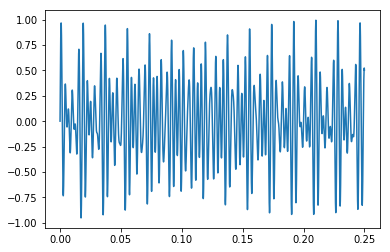

In [440]:
# Big chord

def f(t):
    pitches = [ K.A3, K.Cs4, K.E4 ]
    y = sum([np.sin(2*np.pi*p*t) for p in pitches])
    y = y / len(pitches)
    return y

for i in range(4):
    play(f,duration=2,attack=0.02)

t = np.linspace(0,0.25,100000)
plt.plot(t,f(t));